In [1]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# 2. Load and Explore Dataset
df = pd.read_csv("D:\Projects\Elevate\Task 3 + 4\Housing.csv")  #dataset file
print("First 5 rows of the dataset:")
print(df.head())
print("\nDataset Info:")
print(df.info())

First 5 rows of the dataset:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 e

In [3]:
df.fillna(df.mean(numeric_only=True), inplace=True) #Handle missing values

In [5]:
# 3. Feature Selection
X = df.drop(columns='price')   
y = df['price']

In [6]:
# 4. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [9]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)


X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

In [10]:
# 5. Fit Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [11]:
# 6. Model Coefficients and Intercept
print("\nIntercept:", lr_model.intercept_)
print("Coefficients:", dict(zip(X.columns, lr_model.coef_)))


Intercept: 260032.35760741122
Coefficients: {'area': 235.96880454139543, 'bedrooms': 76778.7016343784, 'bathrooms': 1094444.7861005967, 'stories': 407476.5949849114, 'mainroad': 224841.91327662708, 'guestroom': 367919.9476795726, 'basement': 231610.03717565033, 'hotwaterheating': 390251.17618109385, 'airconditioning': 684649.8853387911, 'parking': 791426.7358431875, 'prefarea': 629890.5653133618, 'furnishingstatus': -126881.81758510874}


In [12]:
# 7. Predictions
y_pred = lr_model.predict(X_test)

In [13]:
# 8. Evaluate Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nEvaluation Metrics:")
print(f"MAE: {mae:.3f}")
print(f"MSE: {mse:.3f}")
print(f"R² Score: {r2:.3f}")


Evaluation Metrics:
MAE: 970043.404
MSE: 1754318687330.663
R² Score: 0.653


In [14]:
# 9. Plotting (for Simple Regression only)
if X.shape[1] == 1:
    plt.scatter(X_test, y_test, color='blue', label='Actual')
    plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
    plt.title('Simple Linear Regression Line')
    plt.xlabel(X.columns[0])
    plt.ylabel('Target')
    plt.legend()
    plt.show()

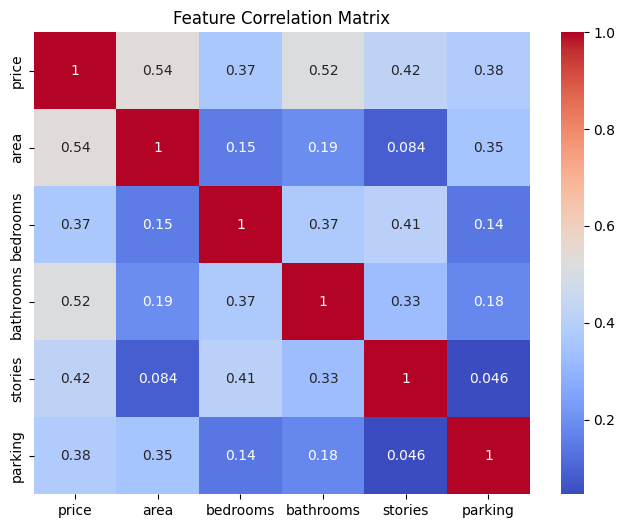

In [15]:
# 10. Correlation Heatmap (for understanding multiple regression)
if X.shape[1] > 1:
    plt.figure(figsize=(8,6))
    corr_matrix = df.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title("Feature Correlation Matrix")
    plt.show()